!pip install tensorflow opencv-python matplotlib

In [102]:
#Getting the size of the Image 

import cv2

# Load the image
image = cv2.imread("resources/ASL_dataset/asl_alphabet_train/A/A4.jpg")

# Get the size
height, width, channels = image.shape
print(f"Height: {height}, Width: {width}, Channels: {channels}")



Height: 200, Width: 200, Channels: 3


# Loading data

In [103]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [104]:
tf.keras.utils.image_dataset_from_directory??


Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [105]:
data = tf.keras.utils.image_dataset_from_directory("resources\ASL_dataset\Asl_alphabet_train", batch_size = 16, image_size=(200, 200))

Found 87000 files belonging to 29 classes.


In [106]:
data_iterator = data.as_numpy_iterator()
#diff batches each time we execute this command
batch = data_iterator.next()

In [107]:
batch[1]

array([19, 14,  8, 11,  0,  4,  7, 21,  0,  1, 10, 19,  6, 15, 17, 24],
      dtype=int32)

In [108]:
#custom mapping of classes 
custom_label_mapping = {"A" : 1,
                        "B" : 2,
                        "C" : 3,
                        "D" : 4,
                        "E" : 5,
                        "F" : 6,
                        "G" : 7,
                        "H" : 8,
                        "I" : 9,
                        "J" : 10,
                        "K" : 11,
                        "L" : 12,
                        "M" : 13,
                        "N" : 14,
                        "O" : 15,
                        "P" : 16,
                        "Q" : 17,
                        "R" : 18,
                        "S" : 19,
                        "T" : 20,
                        "U" : 21,
                        "V" : 22,
                        "W" : 23,
                        "X" : 24,
                        "Y" : 25,
                        "Z" : 26,
                        "del" : 27,
                        "nothing" : 28,
                        "space": 29
                       }

In [109]:
# Map custom labels
def map_custom_labels(images, labels):
    # Create new labels based on the custom mapping
    custom_labels = tf.convert_to_tensor([custom_label_mapping[data.class_names[label]] for label in labels.numpy()])
    return images, custom_labels
    
# Apply the mapping
custom_data = data.map(lambda x, y: tf.py_function(map_custom_labels, inp=[x, y], Tout=(tf.float32, tf.int32)))


In [110]:
custom_data_iterator = custom_data.as_numpy_iterator()
custom_batch = custom_data_iterator.next()

In [111]:
custom_batch[1]

array([15,  9, 29, 20, 27,  9, 24, 15, 20,  1,  7,  5, 17,  5, 13, 29],
      dtype=int32)

In [112]:
custom_batch[0].shape
#(number of images, width, height, depth(color_profile))

(16, 200, 200, 3)

In [113]:
plt.subplots??

Signature:
plt.subplots(
    nrows: 'int' = 1,
    ncols: 'int' = 1,
    *,
    sharex: "bool | Literal['none', 'all', 'row', 'col']" = False,
    sharey: "bool | Literal['none', 'all', 'row', 'col']" = False,
    squeeze: 'bool' = True,
    width_ratios: 'Sequence[float] | None' = None,
    height_ratios: 'Sequence[float] | None' = None,
    subplot_kw: 'dict[str, Any] | None' = None,
    gridspec_kw: 'dict[str, Any] | None' = None,
    **fig_kw,
) -> 'tuple[Figure, Any]'
Source:   
def subplots(
    nrows: int = 1, ncols: int = 1, *,
    sharex: bool | Literal["none", "all", "row", "col"] = False,
    sharey: bool | Literal["none", "all", "row", "col"] = False,
    squeeze: bool = True,
    width_ratios: Sequence[float] | None = None,
    height_ratios: Sequence[float] | None = None,
    subplot_kw: dict[str, Any] | None = None,
    gridspec_kw: dict[str, Any] | None = None,
    **fig_kw
) -> tuple[Figure, Any]:
    """
    Create a figure and a set of subplots.

    This utility wra

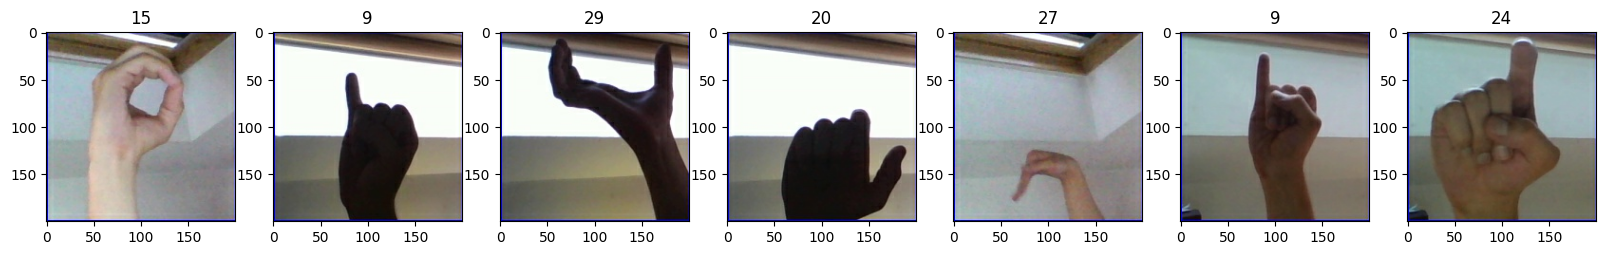

In [114]:
fig, ax = plt.subplots( ncols = 7, figsize = (20,29))
for idx, img in enumerate(custom_batch[0][:7]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(custom_batch[1][idx])

# Preprocessing 

In [115]:
custom_data.shuffle??

Signature:
custom_data.shuffle(
    buffer_size,
    seed=None,
    reshuffle_each_iteration=True,
    name=None,
) -> 'DatasetV2'
Source:   
  def shuffle(
      self, buffer_size, seed=None, reshuffle_each_iteration=True, name=None
  ) -> "DatasetV2":
    """Randomly shuffles the elements of this dataset.

    This dataset fills a buffer with `buffer_size` elements, then randomly
    samples elements from this buffer, replacing the selected elements with new
    elements. For perfect shuffling, a buffer size greater than or equal to the
    full size of the dataset is required.

    For instance, if your dataset contains 10,000 elements but `buffer_size` is
    set to 1,000, then `shuffle` will initially select a random element from
    only the first 1,000 elements in the buffer. Once an element is selected,
    its space in the buffer is replaced by the next (i.e. 1,001-st) element,
    maintaining the 1,000 element buffer.

    `reshuffle_each_iteration` controls whether the shuff

# REMOVE THE BELOW CELL DURING FINAL TRAINING ON COLAB/GPU

In [116]:
len(custom_data)

5438

In [117]:
#!!!!!!!!!!!!!!!!!!!!!!!!! REMOVE REMOVE REMOVE BEFORE GPU TRAINING 
### IT IS 1/4TH OF THE ACTUAL DATA SET
custom_data = custom_data.take(1359)

In [118]:
#shuffling the Custom_data
custom_data = custom_data.shuffle(buffer_size=1359)

# scaling the Data

In [119]:
custom_data = custom_data.map(lambda x, y: (x/255 , y))
scaled_data_iterator = custom_data.as_numpy_iterator()
scaled_batch = scaled_data_iterator.next()

In [120]:
scaled_batch[0].max()

np.float32(1.0)

In [121]:
scaled_batch[0].min()

np.float32(0.0)

# Spliting the data (0.7,0.2,0.1)

In [122]:
train = int(len(custom_data)*0.7) #951
val = int(len(custom_data)*0.2)+2 #273
test = int(len(custom_data)*0.1) #135

In [125]:
train_data = custom_data.take(train)
val_data = custom_data.skip(train).take(val)
test_data = custom_data.skip(train+val).take(test)

# Network

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [127]:
model = Sequential()

In [128]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (200,200,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(200,activation = 'relu'))
model.add(Dense(29,activation = 'sigmoid'))


In [129]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(),metrics = ['accuracy'])


In [130]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 198, 198, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 99, 99, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 97, 97, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 46, 46, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 23, 23, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 8464)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 200)                 │       1,693,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 29)                  │           5,829 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,708,541 (6.52 MB)

 Trainable params: 1,708,541 (6.52 MB)

 Non-trainable params: 0 (0.00 B)

## Train

In [131]:
logdir = 'logs'

In [132]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [133]:
for images, labels in train_data.take(1):
    print(f"Images shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")


Images shape: (16, 200, 200, 3)
Labels shape: (16,)


In [135]:
model.fit??


Signature:
model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
)
Docstring:
Trains the model for a fixed number of epochs (dataset iterations).

Args:
    x: Input data. It can be:
        - A NumPy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
        - A backend-native tensor, or a list of tensors
        (in case the model has multiple inputs).
        - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
        - A `keras.utils.PyDataset` returning `(inputs, targets)` or
        `(inputs, targets, sample_weights)`.
        - A `tf.data.Dataset` yielding `(inputs, targets)` or
        `(in

In [ ]:
hist = model.fit(train_data, epochs=25, validation_data=val_data, callbacks=[tensorboard_callback])
